<a href="https://colab.research.google.com/github/ALAIKBITTUQOH/Tugas_Visi_Komputer/blob/main/Model_Dan_Transformasi_Warna_Pada_Citra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving 60c41e45-5e20-458d-ba24-2fbb24d7982a-luffy-cool-wallpaper.webp to 60c41e45-5e20-458d-ba24-2fbb24d7982a-luffy-cool-wallpaper.webp


<ipython-input-1-f51a4094e394>:53: RuntimeWarning: divide by zero encountered in log
  return np.uint8(c * np.log(1 + img))
<ipython-input-1-f51a4094e394>:53: RuntimeWarning: invalid value encountered in cast
  return np.uint8(c * np.log(1 + img))


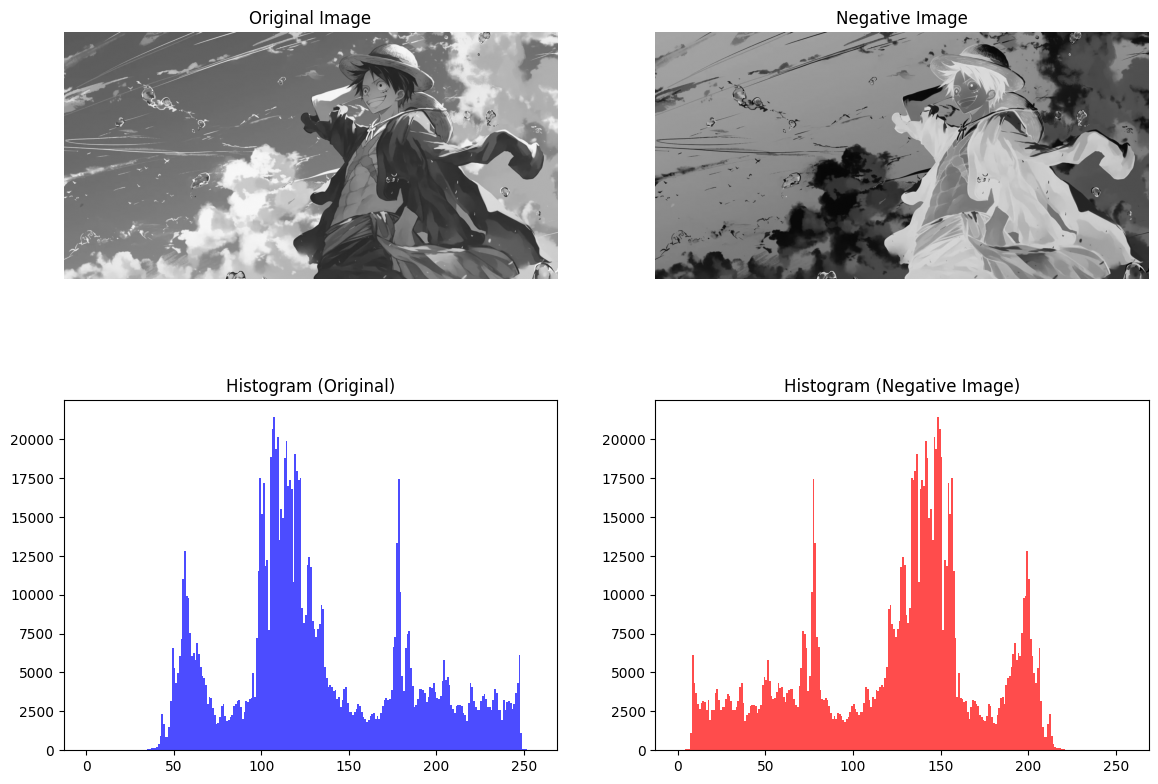

>> Negative Image <<
➡ Kondisi Input: Gambar asli dalam grayscale dengan variasi terang dan gelap.
➡ Kondisi Output: Warna menjadi kebalikan dari input: area terang menjadi gelap, area gelap menjadi terang.
--------------------------------------------------------------------------------


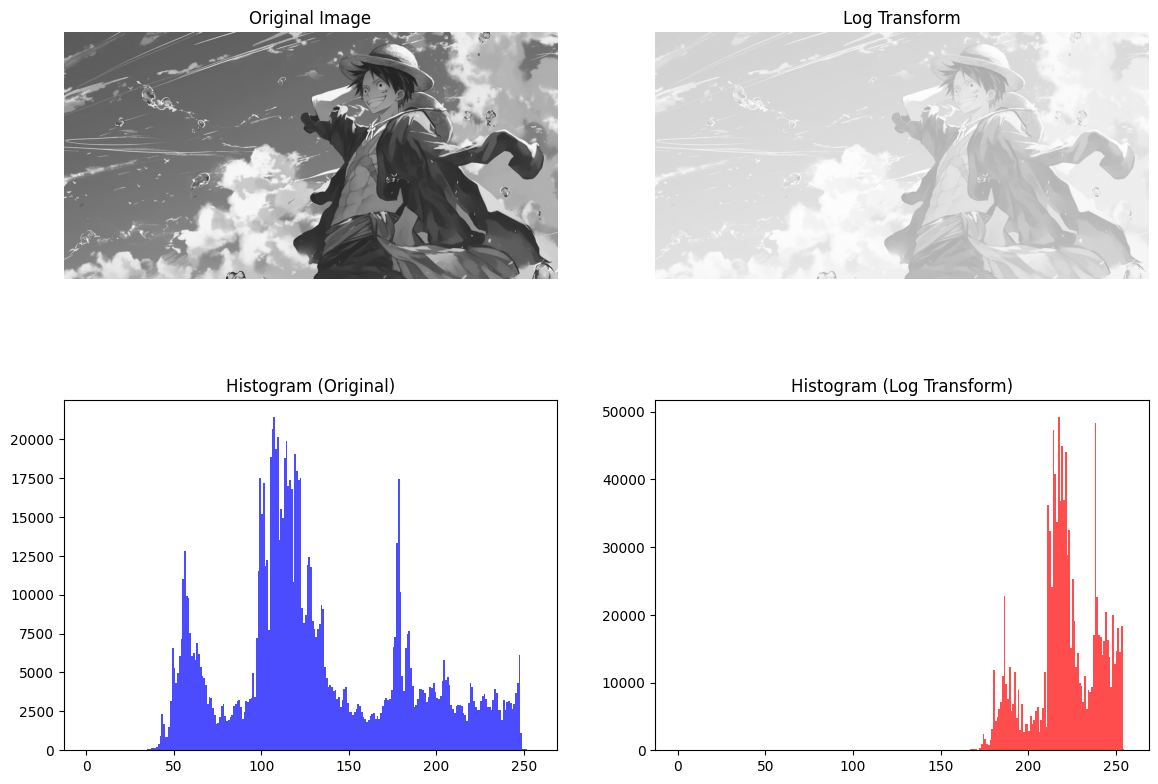

>> Log Transform <<
➡ Kondisi Input: Gambar asli dengan banyak detail di area gelap.
➡ Kondisi Output: Area gelap menjadi lebih terang, meningkatkan detail tanpa terlalu mempercerah area terang.
--------------------------------------------------------------------------------


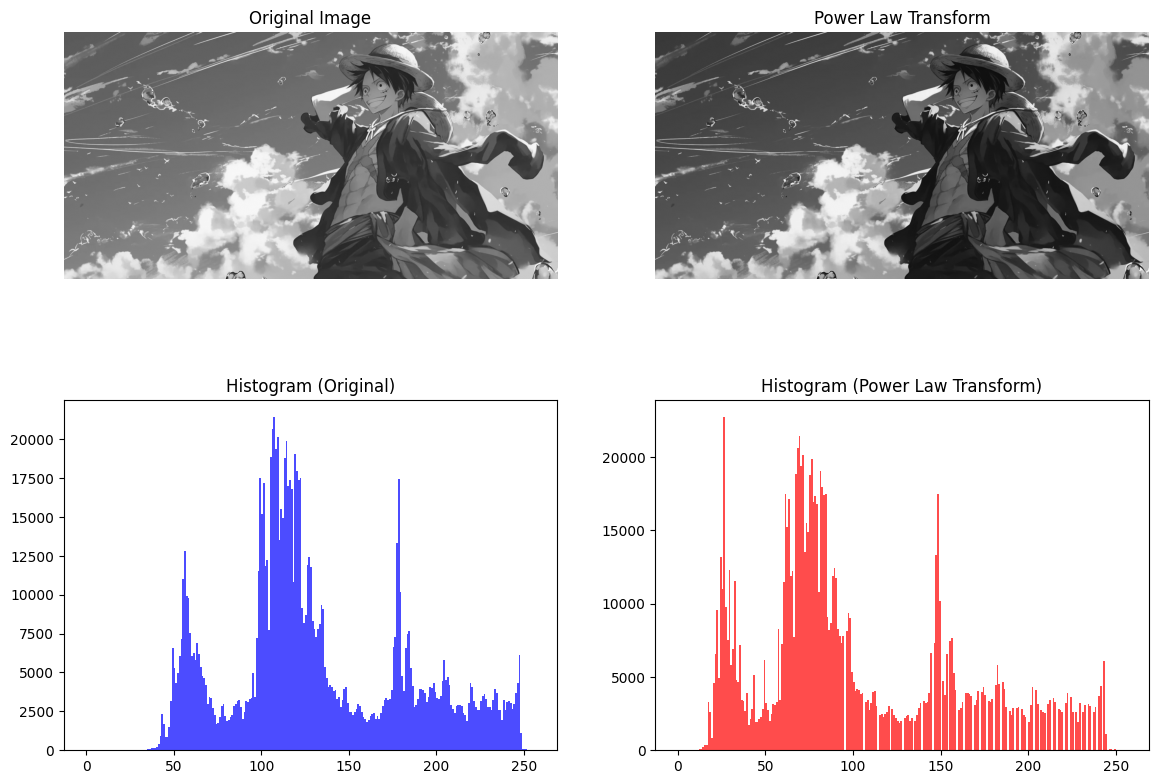

>> Power Law Transform <<
➡ Kondisi Input: Gambar dengan distribusi intensitas tidak merata.
➡ Kondisi Output: Menyesuaikan kontras berdasarkan nilai gamma. Jika gamma > 1, gambar menjadi lebih gelap.
--------------------------------------------------------------------------------


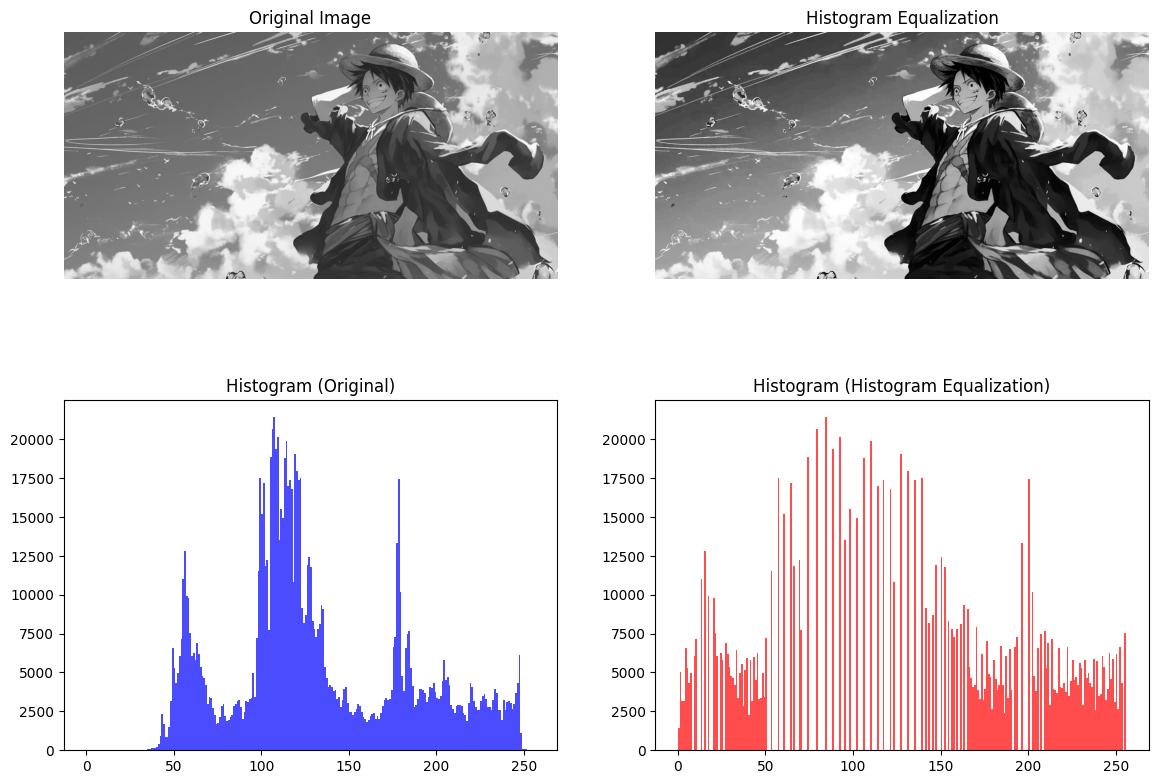

>> Histogram Equalization <<
➡ Kondisi Input: Gambar dengan kontras rendah.
➡ Kondisi Output: Kontras meningkat karena distribusi intensitas lebih merata.
--------------------------------------------------------------------------------


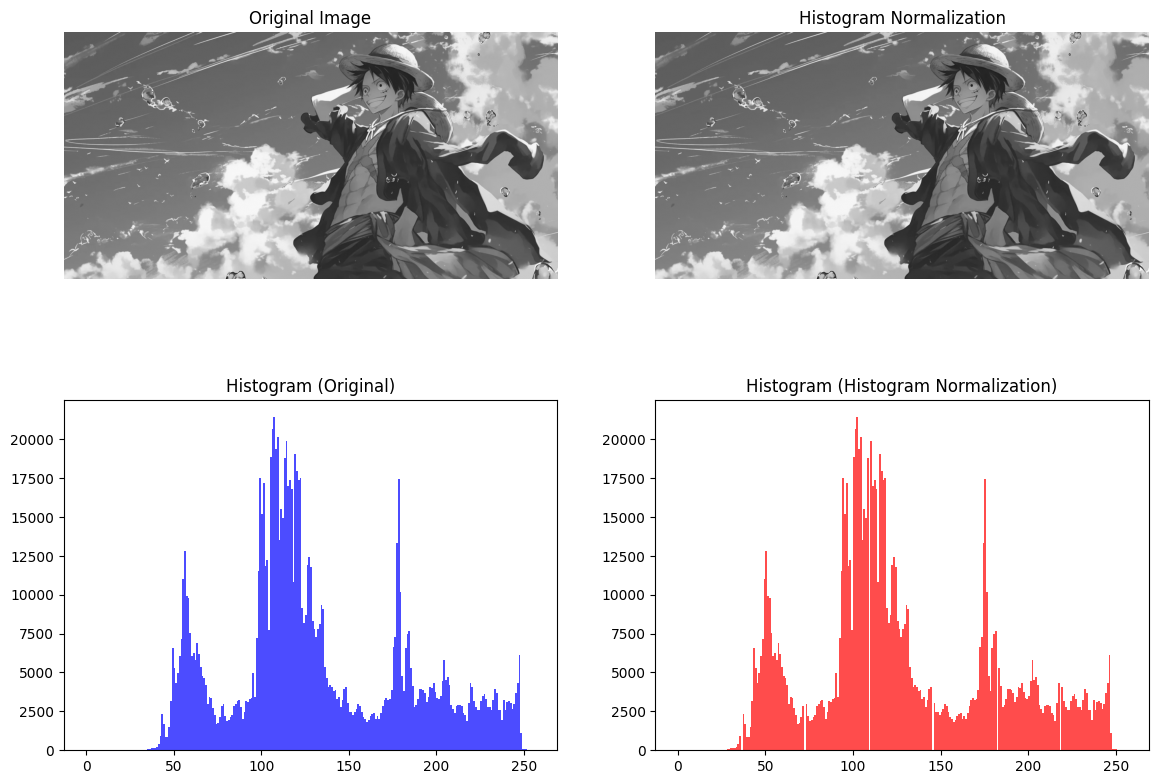

>> Histogram Normalization <<
➡ Kondisi Input: Gambar dengan rentang intensitas sempit.
➡ Kondisi Output: Rentang intensitas lebih luas, membuat detail lebih terlihat.
--------------------------------------------------------------------------------


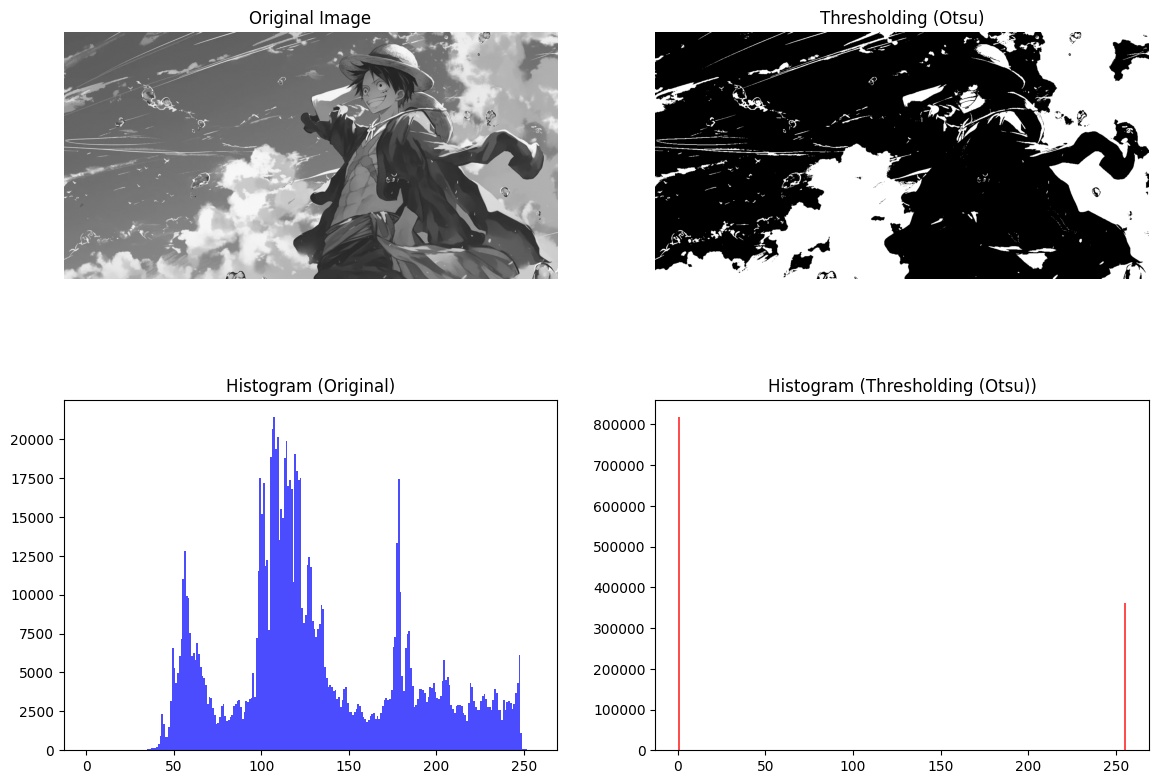

>> Thresholding (Otsu) <<
➡ Kondisi Input: Gambar grayscale dengan tingkat intensitas yang bervariasi.
➡ Kondisi Output: Gambar biner (hitam-putih) dengan objek tersegmentasi berdasarkan nilai threshold optimal.
--------------------------------------------------------------------------------


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Fungsi untuk menampilkan hasil transformasi dengan penjelasan langsung
def show_results(title, original, transformed, description):
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # Tampilkan gambar asli
    axes[0, 0].imshow(original, cmap='gray')
    axes[0, 0].set_title("Original Image")
    axes[0, 0].axis('off')

    # Histogram gambar asli
    axes[1, 0].hist(original.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.7)
    axes[1, 0].set_title("Histogram (Original)")

    # Tampilkan gambar setelah transformasi
    axes[0, 1].imshow(transformed, cmap='gray')
    axes[0, 1].set_title(title)
    axes[0, 1].axis('off')

    # Histogram gambar setelah transformasi
    axes[1, 1].hist(transformed.ravel(), bins=256, range=[0, 256], color='red', alpha=0.7)
    axes[1, 1].set_title(f"Histogram ({title})")

    plt.show()

    print(f">> {title} <<")
    print(f"➡ Kondisi Input: {description['input']}")
    print(f"➡ Kondisi Output: {description['output']}")
    print("-" * 80)

# Fungsi membaca gambar dalam mode grayscale
def load_image():
    uploaded = files.upload()
    filename = list(uploaded.keys())[0]
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print("Error: Gambar tidak ditemukan atau format tidak didukung!")
        return None, None
    return img, filename

# 1. Citra Negatif
def negative_image(img):
    return 255 - img

# 2. Transformasi Log
def log_transform(img):
    c = 255 / np.log(1 + np.max(img))
    return np.uint8(c * np.log(1 + img))

# 3. Transformasi Power Law (Gamma Correction)
def power_law_transform(img, gamma=1.5):
    c = 255 / np.power(255, gamma)
    return np.uint8(c * np.power(img, gamma))

# 4. Histogram Equalization
def histogram_equalization(img):
    return cv2.equalizeHist(img)

# 5. Histogram Normalization
def histogram_normalization(img):
    img_min, img_max = np.min(img), np.max(img)
    return np.uint8((img - img_min) / (img_max - img_min) * 255)

# 6. Thresholding (Otsu)
def otsu_thresholding(img):
    _, thresh_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return thresh_img

# Load gambar
img_gray, filename = load_image()
if img_gray is not None:
    # Terapkan metode transformasi
    img_negative = negative_image(img_gray)
    img_log = log_transform(img_gray)
    img_powerlaw = power_law_transform(img_gray, gamma=1.5)
    img_eq = histogram_equalization(img_gray)
    img_norm = histogram_normalization(img_gray)
    img_thresh = otsu_thresholding(img_gray)

    # Deskripsi hasil transformasi (input vs output)
    descriptions = {
        "Negative Image": {
            "input": "Gambar asli dalam grayscale dengan variasi terang dan gelap.",
            "output": "Warna menjadi kebalikan dari input: area terang menjadi gelap, area gelap menjadi terang."
        },
        "Log Transform": {
            "input": "Gambar asli dengan banyak detail di area gelap.",
            "output": "Area gelap menjadi lebih terang, meningkatkan detail tanpa terlalu mempercerah area terang."
        },
        "Power Law Transform": {
            "input": "Gambar dengan distribusi intensitas tidak merata.",
            "output": "Menyesuaikan kontras berdasarkan nilai gamma. Jika gamma > 1, gambar menjadi lebih gelap."
        },
        "Histogram Equalization": {
            "input": "Gambar dengan kontras rendah.",
            "output": "Kontras meningkat karena distribusi intensitas lebih merata."
        },
        "Histogram Normalization": {
            "input": "Gambar dengan rentang intensitas sempit.",
            "output": "Rentang intensitas lebih luas, membuat detail lebih terlihat."
        },
        "Thresholding (Otsu)": {
            "input": "Gambar grayscale dengan tingkat intensitas yang bervariasi.",
            "output": "Gambar biner (hitam-putih) dengan objek tersegmentasi berdasarkan nilai threshold optimal."
        }
    }

    # Tampilkan hasil transformasi dengan penjelasan langsung
    show_results("Negative Image", img_gray, img_negative, descriptions["Negative Image"])
    show_results("Log Transform", img_gray, img_log, descriptions["Log Transform"])
    show_results("Power Law Transform", img_gray, img_powerlaw, descriptions["Power Law Transform"])
    show_results("Histogram Equalization", img_gray, img_eq, descriptions["Histogram Equalization"])
    show_results("Histogram Normalization", img_gray, img_norm, descriptions["Histogram Normalization"])
    show_results("Thresholding (Otsu)", img_gray, img_thresh, descriptions["Thresholding (Otsu)"])
